In [1]:
import nltk
nltk.download('punkt')
import re

from nltk.tokenize import word_tokenize

# load the data
import pandas as pd
data = pd.read_csv('tweets.csv')

# tokenize the text
tokens = [word_tokenize(tweet) for tweet in data['OriginalTweet']]

url_pattern = re.compile(r'http\S+')
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

tokens_clean = []
for tweet_tokens in tokens:
    clean_tokens = []
    for token in tweet_tokens:
        # remove URLs
        token = re.sub(url_pattern, '', token)
        # remove special characters
        token = re.sub(special_char_pattern, '', token)
        # check if the token is not an empty string
        if token:
            clean_tokens.append(token)
    tokens_clean.append(clean_tokens)

print("Cleaned tokens:\n", tokens_clean)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned tokens:
 [['TRENDING', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'Wegmans', 'in', 'Brooklyn', 'soldout', 'online', 'grocers', 'FoodKick', 'MaxDelivery', 'as', 'coronavirusfearing', 'shoppers', 'stock', 'up', 'tcoGr76pcrLWh', 'tcoivMKMsqdT1'], ['When', 'I', 'could', 'nt', 'find', 'hand', 'sanitizer', 'at', 'Fred', 'Meyer', 'I', 'turned', 'to', 'Amazon', 'But', '11497', 'for', 'a', '2', 'pack', 'of', 'Purell', 'Check', 'out', 'how', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', 'tcoygbipBflMY'], ['Find', 'out', 'how', 'you', 'can', 'protect', 'yourself', 'and', 'loved', 'ones', 'from', 'coronavirus'], ['Panic', 'buying', 'hits', 'NewYork', 'City', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', 'amp', 'medical', 'supplies', 'after', 'healthcare', 'worker', 'in', 'her', '30s', 'becomes', 'BigApple', '1st', 'confirmed', 'coronavirus', 'patient', 'OR', 'a', 'Bloomberg', 'staged', 'event', 'tcoIASiReGPC4', 'QAnon', 'QAnon20

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [[word for word in tweet if not word.lower() in stop_words] for tweet in tokens_clean]
print(filtered_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['TRENDING', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'Wegmans', 'Brooklyn', 'soldout', 'online', 'grocers', 'FoodKick', 'MaxDelivery', 'coronavirusfearing', 'shoppers', 'stock', 'tcoGr76pcrLWh', 'tcoivMKMsqdT1'], ['could', 'nt', 'find', 'hand', 'sanitizer', 'Fred', 'Meyer', 'turned', 'Amazon', '11497', '2', 'pack', 'Purell', 'Check', 'coronavirus', 'concerns', 'driving', 'prices', 'tcoygbipBflMY'], ['Find', 'protect', 'loved', 'ones', 'coronavirus'], ['Panic', 'buying', 'hits', 'NewYork', 'City', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', '30s', 'becomes', 'BigApple', '1st', 'confirmed', 'coronavirus', 'patient', 'Bloomberg', 'staged', 'event', 'tcoIASiReGPC4', 'QAnon', 'QAnon2018', 'QAnon2020', 'Election2020', 'CDC', 'tco29isZOewxu'], ['toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'CoronaVirusUpdate', 'Covid19', '9News', 'Corvid19', '7NewsMelb', 'dunnypapergate', 'Costco', '

In [3]:
from collections import Counter

# count word frequencies
word_freq = Counter()
for tweet in filtered_tokens:
    word_freq.update(tweet)
print(word_freq)
print(dict(word_freq))

Counter({'Covid19': 1554, 'food': 1207, 'coronavirus': 1197, 'store': 975, 'grocery': 760, 'COVID19': 703, 'stock': 683, 'people': 682, 'amp': 610, 'shopping': 503, 'supermarket': 465, 'online': 452, 'panic': 427, 'prices': 406, 'need': 350, 'nt': 344, 'paper': 340, 'toilet': 332, 'like': 314, 'get': 301, 'buying': 276, '19': 250, 'go': 245, 'going': 242, 'Coronavirus': 238, 'local': 237, 'CoronavirusPandemic': 218, 'time': 216, 'home': 215, 'shelves': 202, 'work': 195, 'retail': 193, 'COVID': 189, 'buy': 188, 'stores': 185, 'help': 176, 'due': 175, 'COVID2019': 175, 'today': 172, 'supplies': 161, 'us': 160, 'CoronaOutbreak': 158, 'everyone': 154, '2': 150, 'covid19': 150, 'demand': 149, 'consumer': 142, 'dont': 141, 'pandemic': 137, 'coronapocalypse': 135, 'would': 133, 'one': 130, 'virus': 129, 'hand': 126, 'panicbuying': 125, 'know': 122, 'empty': 121, 'Im': 120, 'still': 118, 'even': 118, 'Please': 117, 'please': 117, 'water': 116, 'items': 116, 'Food': 115, 'think': 113, 'many': 1

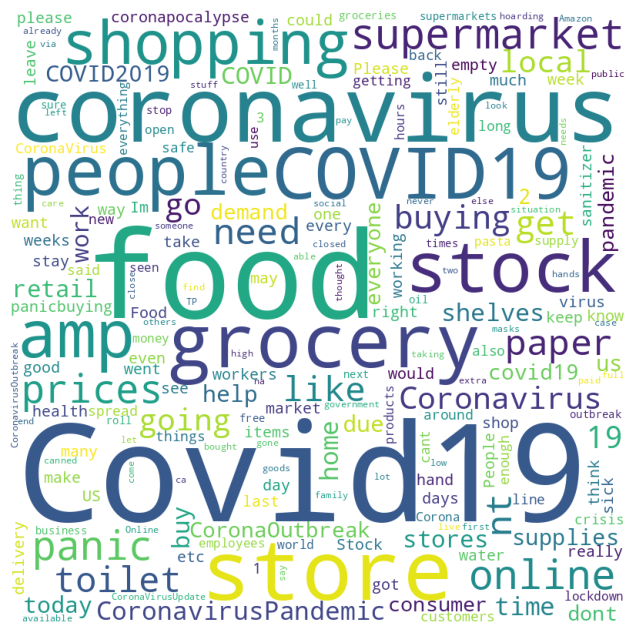

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
